# **Tugas Unsupervised**

Nama    : Ananda Rafi Amanullah
Kelas   : EL-45-07
NIM     : 1102213017

## K-Means

In [2]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.4, 2.1],
        [-1.5 , 2.3],
        [-2.9, 1.2],
        [-2.8, 2.4],
        [-2.3, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.11, 0.2])
X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=42)

In [3]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
    plt.ylabel("$x_2$", fontsize=10, fontfamily ='monospace', fontstyle='oblique', rotation=0)


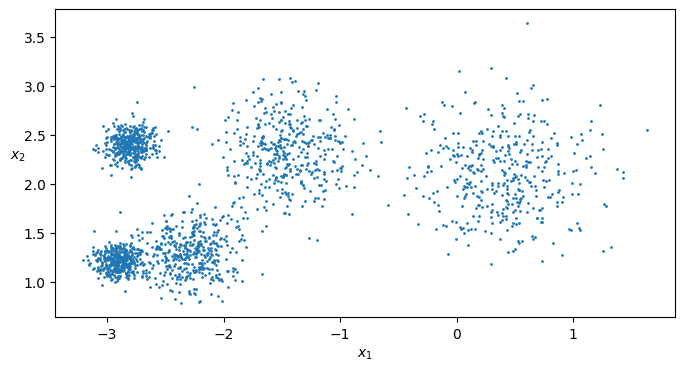

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Melakukan training algoritma clustering dari K-Means pada dataset

In [5]:
from sklearn.cluster import KMeans

k=6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [6]:
y_pred

array([3, 2, 1, ..., 5, 3, 4])

In [7]:
y_pred is kmeans.labels_

True

In [8]:
kmeans.cluster_centers_

array([[-1.4387252 ,  2.33401189],
       [-2.23693769,  1.31277248],
       [ 0.35737506,  2.43353818],
       [-2.79871971,  2.4030944 ],
       [-2.87972456,  1.21107182],
       [ 0.44496364,  1.79970107]])

In [9]:
X_new = np.array([[4.2, 2], [1, 2], [-3, 4], [-3, 2.2]])
#Data baru yang akan dimasukan ke clastering training diatas
kmeans.predict(X_new)

array([5, 5, 3, 3])

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, linewidths=30, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=40, linewidths=10, color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0, fontfamily ='monospace', fontstyle='oblique')
    else:
        plt.tick_params(labelleft=False)

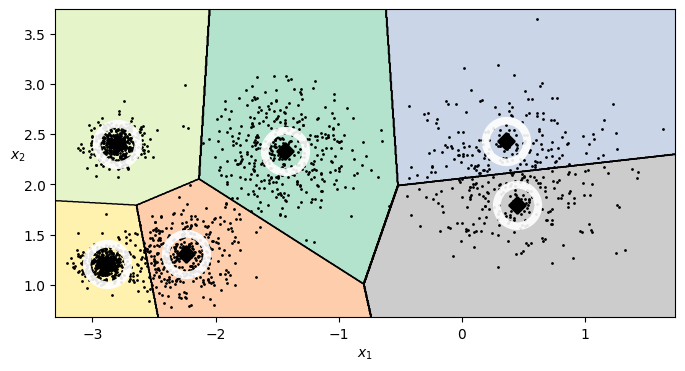

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [12]:
kmeans.inertia_

195.1624590780613

### Membandingkan hasil clustering dari jumlah K berbeda

In [13]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=5, fontfamily ='monospace', fontstyle='oblique')
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=5, fontfamily ='monospace', fontstyle='oblique')

In [14]:
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)


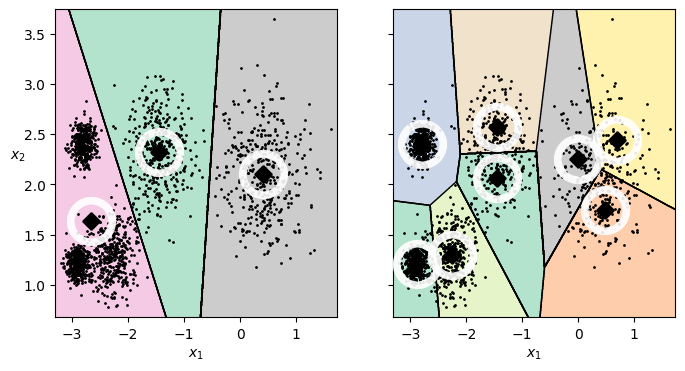

In [15]:
plot_clusterer_comparison(kmeans_k3,kmeans_k8,X)
plt.show()

### Menentukan Jumlah K dari Model Inertia

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
for k in range(1, 20)]


In [17]:
inertias = [model.inertia_ for model in kmeans_per_k]

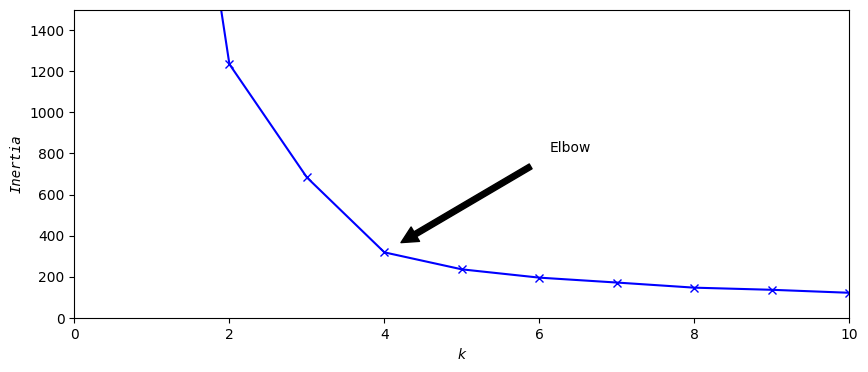

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 20), inertias, "bx-")
plt.xlabel("$k$", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
plt.ylabel("Inertia", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction' , fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 10, 0, 1500])
plt.show()

### Menentukan Jumlah K dengan silhoutte

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)


0.5773887370609111

In [26]:
silhouette_scores = [silhouette_score(X, model.labels_)
for model in kmeans_per_k[1:]]

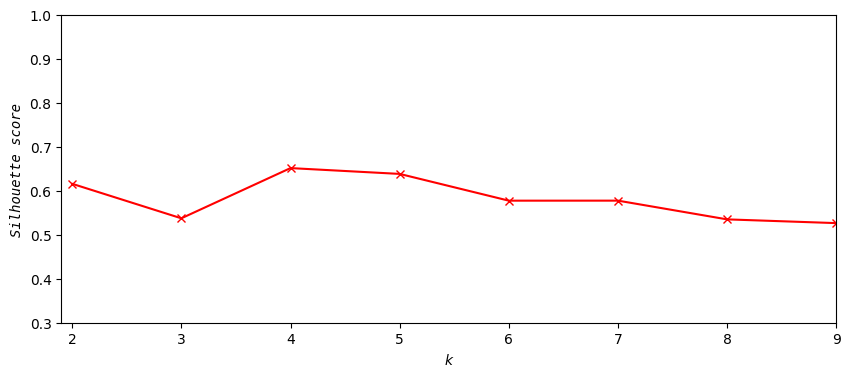

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(range(2, 20), silhouette_scores, "rx-")
plt.xlabel("$k$", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
plt.ylabel("Silhouette score", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
plt.axis([1.9, 9, 0.3, 1])
plt.show()

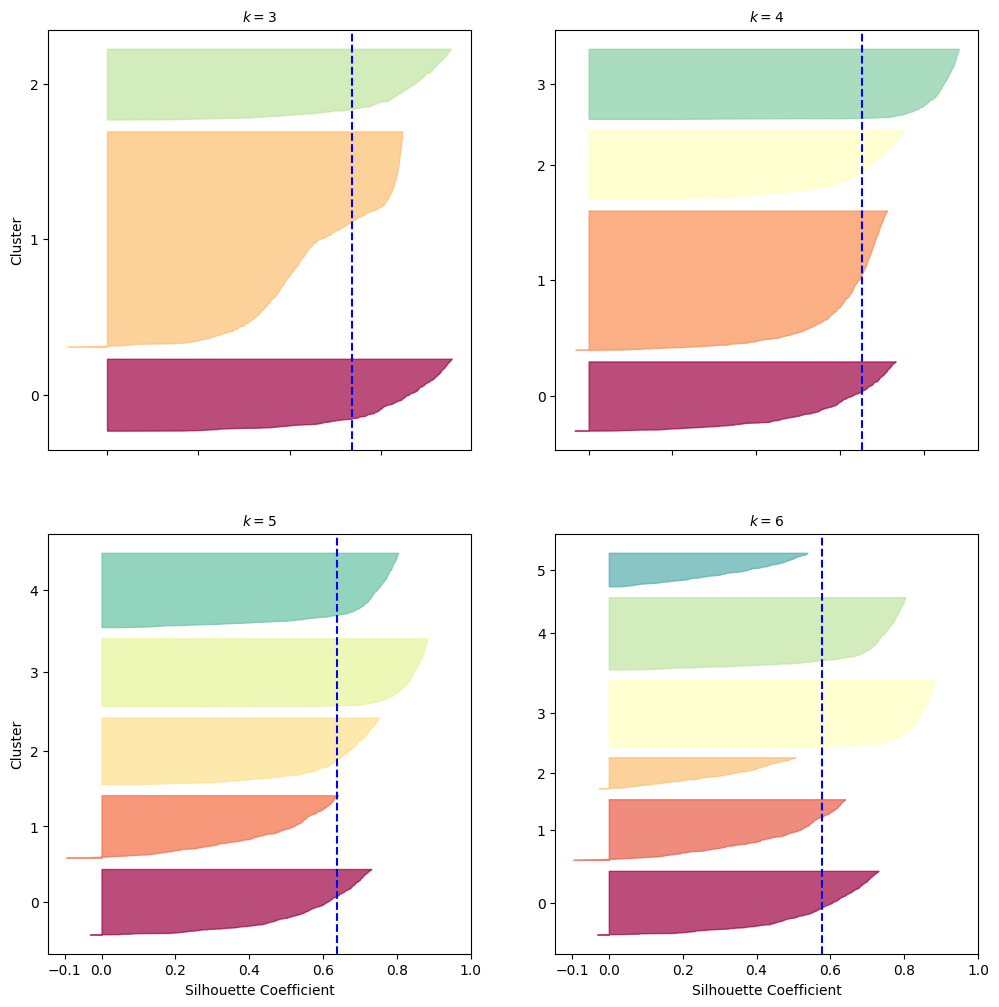

In [44]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
plt.figure(figsize=(12, 12))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color="b", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=10, fontfamily ='monospace', fontstyle='oblique')
plt.show()


## DbScan

In [70]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [84]:
X, y = make_moons(n_samples=20000, noise=0.05, random_state=42)

In [74]:
from sklearn.cluster import DBSCAN

In [85]:
dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.05, min_samples=10)

In [86]:
dbscan.labels_[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [87]:
len(dbscan.core_sample_indices_)

19840

In [91]:
dbscan.core_sample_indices_[:15] # hanya 15 data pertama

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [92]:
dbscan.components_[:5] # hanya 5 data pertama

array([[ 0.01204802,  0.24141893],
       [ 0.78092981,  0.59017383],
       [-0.97975635,  0.46045185],
       [ 0.96782414,  0.29047615],
       [ 0.57300793, -0.40524227]])

In [94]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [96]:
dbscan2 = DBSCAN(eps=0.3)
dbscan2.fit(X)

DBSCAN(eps=0.3)

In [106]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1],c=dbscan.labels_[core_mask], marker='.', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='.', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="b", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="*")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10, fontfamily ='monospace', fontstyle='oblique')
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, fontfamily ='monospace', fontstyle='oblique', rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=10, fontfamily ='monospace', fontstyle='oblique')

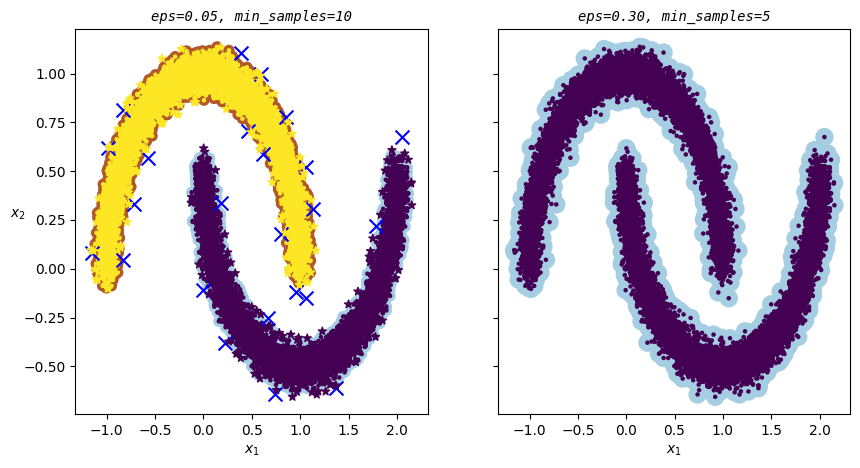

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_dbscan(dbscan, X, size=200)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()


In [109]:
dbscan = dbscan2

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(n_neighbors=100)

In [113]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 0, 0, 0], dtype=int64)

In [114]:
knn.predict_proba(X_new)

array([[1.],
       [1.],
       [1.],
       [1.]])

In [116]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [121]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=8, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=20, color=cross_color, zorder=11, alpha=1)


In [122]:
def plot_decision_boundaries(clusterer, X, resolution=1000,show_centroids=True,show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10, fontfamily ='monospace', fontstyle='oblique' )
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, fontfamily ='monospace', fontstyle='oblique' , rotation=0)
    else:
        plt.tick_params(labelleft=False)


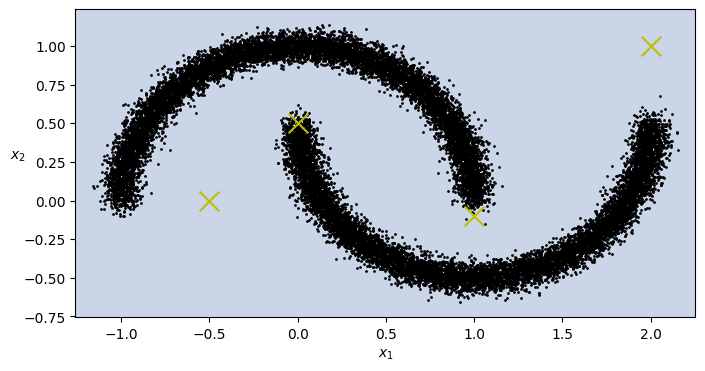

In [123]:
plt.figure(figsize=(10, 4))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="y", marker="x", s=100,zorder=10)
plt.show()


## Gaussian Mixture

In [56]:
import numpy as np
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=2000, centers=((4, -4), (0, 0)),random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=300, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [57]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=10, fontfamily ='monospace', fontstyle='normal')
    plt.ylabel("$x_2$", fontsize=10, rotation=0, fontfamily ='monospace', fontstyle='normal')

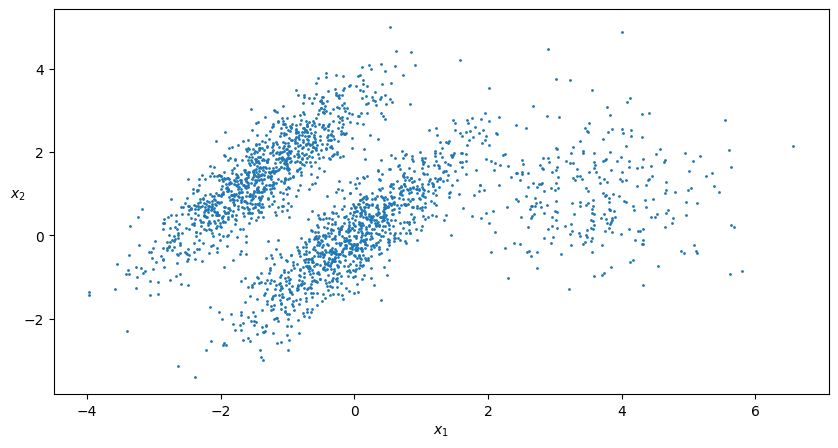

In [58]:
plt.figure(figsize=(10, 5))
plot_clusters(X)
plt.show()

In [59]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5, n_init=20, random_state=42)
gm.fit(X)

GaussianMixture(n_components=5, n_init=20, random_state=42)

In [60]:
gm.weights_ # bobot

array([0.19942421, 0.23352216, 0.2004705 , 0.23543763, 0.13114551])

In [61]:
gm.means_ # means

array([[ 0.4967893 ,  0.71505079],
       [-1.82053034,  0.84377386],
       [-0.86323436,  2.21264969],
       [-0.44920039, -0.65866526],
       [ 3.48779343,  1.04764138]])

In [62]:
gm.covariances_ # matriks kovariansi

array([[[ 0.47032665,  0.47968183],
        [ 0.47968183,  0.77380932]],

       [[ 0.45420913,  0.46867707],
        [ 0.46867707,  0.75177065]],

       [[ 0.45313206,  0.43994306],
        [ 0.43994306,  0.71521571]],

       [[ 0.44746402,  0.46585915],
        [ 0.46585915,  0.79971674]],

       [[ 0.92056387, -0.05747731],
        [-0.05747731,  1.03119839]]])

In [63]:
gm.converged_

True

In [64]:
gm.n_iter_

7

In [65]:
gm.predict(X)

array([4, 2, 1, ..., 4, 4, 4], dtype=int64)

In [66]:
gm.predict_proba(X)

array([[4.36373303e-01, 2.52594559e-14, 9.07074435e-12, 9.38022611e-03,
        5.54246471e-01],
       [2.63535591e-09, 1.41790166e-02, 9.85626738e-01, 1.41451508e-10,
        1.94242220e-04],
       [1.23655275e-09, 9.95270010e-01, 4.72994532e-03, 4.33673939e-08,
        2.47248763e-12],
       ...,
       [8.25459949e-05, 3.46975697e-25, 1.53404237e-21, 2.19854448e-06,
        9.99915255e-01],
       [1.59436532e-04, 4.48137294e-24, 3.84052872e-20, 1.19781842e-06,
        9.99839366e-01],
       [1.49994874e-04, 8.74145663e-25, 2.20918556e-21, 7.35455580e-06,
        9.99842651e-01]])

In [67]:
gms_per_k = [GaussianMixture(n_components=k, n_init=20, random_state=42).fit(X) for k in range(1, 25)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

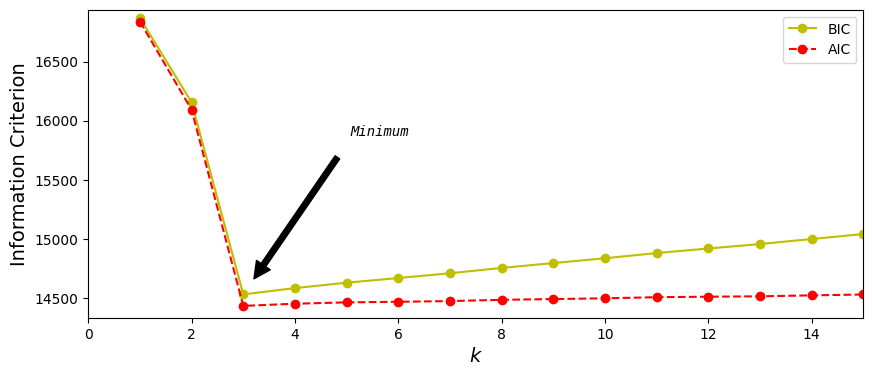

In [68]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 25), bics, "yo-", label="BIC")
plt.plot(range(1, 25), aics, "ro--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([0, 15, np.min(aics) - 100, np.max(aics) + 100])
plt.annotate('Minimum', xy=(3, bics[2]), xytext=(0.35, 0.6), textcoords='figure fraction', fontsize=10, fontfamily ='monospace', fontstyle='italic', arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()
plt.show()